In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
file_path = '/content/drive/MyDrive/CS210_Datas/Türkiye ekonomisi/kurlar.xlsx'


Mounted at /content/drive/


In [2]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
kur_df = pd.read_excel(file_path) # kur datası
#print(df)

In [4]:
file_path2 = '/content/drive/MyDrive/CS210_Datas/Türkiye ekonomisi/türkiye tüfe verisi.xlsx'
tufe_df = pd.read_excel(file_path2) # tüfe datası
tufe_rising = tufe_df.copy()
#print(df2)

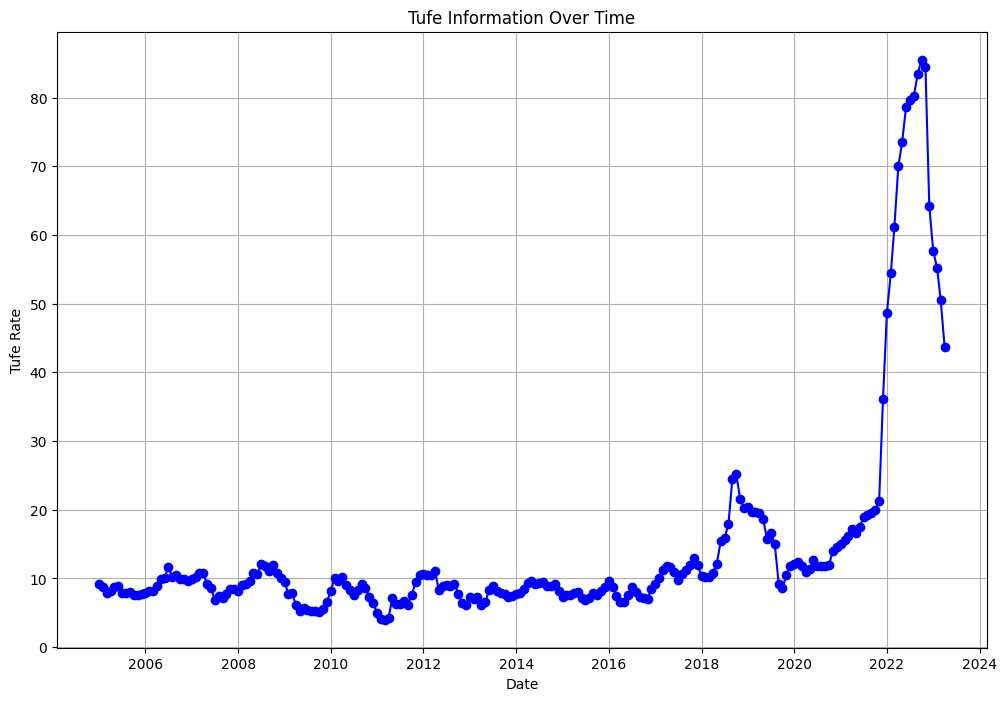

In [5]:
tufe_df['Dates'] = pd.to_datetime(tufe_df['Dates'])
tufe_df.set_index('Dates', inplace=True)
plt.figure(figsize=(12, 8))
plt.plot(tufe_df.index, tufe_df['TÜFE (Yıllık % Değişim)'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Tufe Rate')
plt.title('Tufe Information Over Time')
plt.grid(True)
plt.show()

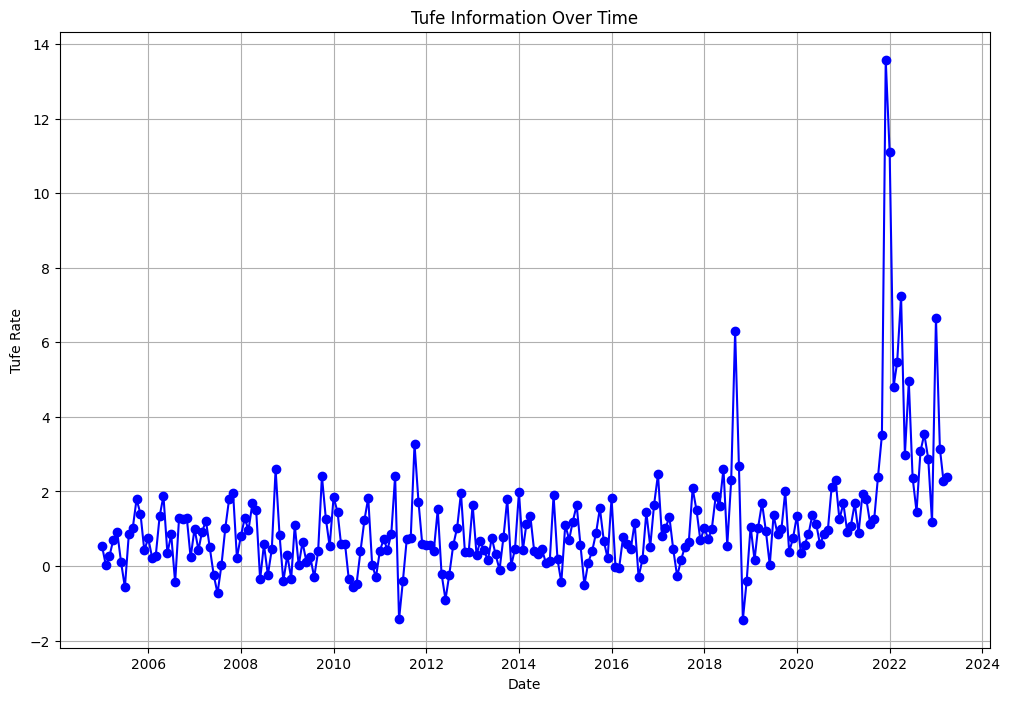

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(tufe_df.index, tufe_df['TÜFE (Aylık % Değişim)'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Tufe Rate')
plt.title('Tufe Information Over Time')
plt.grid(True)
plt.show()

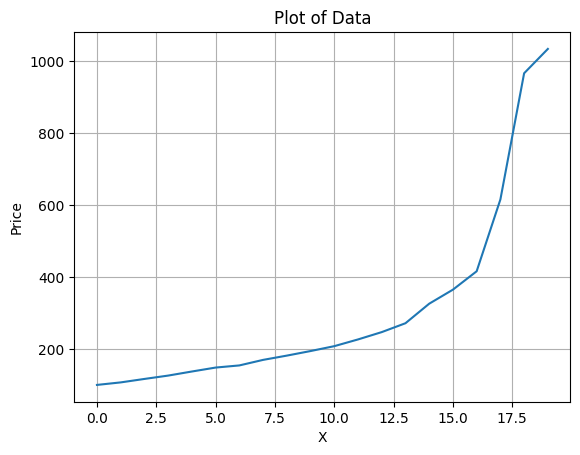

In [7]:
last_row_index = tufe_df.shape[0] - 1
start_row_index = last_row_index
step = 12

base = 100
prices = []

prices.append(base)

while start_row_index >= 0:
    #print(tufe_df.iloc[start_row_index, 0])  # Assuming 'tufe' is the second column
    start_row_index -= step
    oran = int(tufe_df.iloc[start_row_index, 0])
    oran = oran + 100
    new_price = prices[-1] * oran / 100
    prices.append(new_price)


x = range(len(prices))

# Plot the data
plt.plot(x, prices)
plt.xlabel('X')
plt.ylabel('Price')
plt.title('Plot of Data')
plt.grid(True)
plt.show()

<ipython-input-8-293213aabbf8>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  kur_df['tarih'] = pd.to_datetime(kur_df['tarih'])


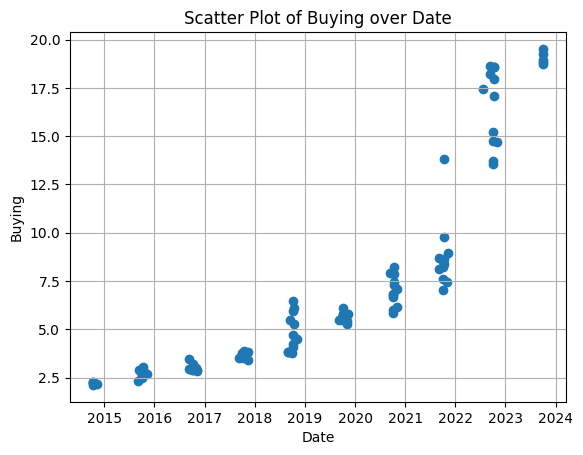

In [8]:
#print(kur_df)
kur_df['tarih'] = pd.to_datetime(kur_df['tarih'])

# Plot the data as a scatter plot
plt.scatter(kur_df['tarih'], kur_df['alış'])
plt.xlabel('Date')
plt.ylabel('Buying')
plt.title('Scatter Plot of Buying over Date')
plt.grid(True)
plt.show()

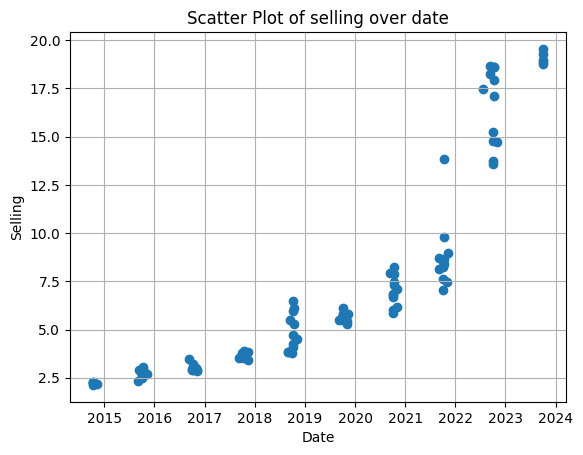

In [9]:
kur_df['tarih'] = pd.to_datetime(kur_df['tarih'])

# Plot the data as a scatter plot
plt.scatter(kur_df['tarih'], kur_df['satış'])
plt.xlabel('Date')
plt.ylabel('Selling')
plt.title('Scatter Plot of selling over date')
plt.grid(True)
plt.show()

In [10]:
"""
#tufe_rising = tufe_df.copy()
tufe_rising.at[0,'Baz Puanından Artış'] = 100
prev_row = None
for index, row in tufe_rising.iterrows():
    if prev_row == None:
      continue
    old_data = row['TÜFE (Aylık % Değişim)']
    new_data = prev_row['Baz Puanından Artış']*(100+(float(old_data)/100))
    tufe_rising.at[index, 'Baz Puanından Artış'] = new_data
    prev_row = row

tufe_rising"""

"\n#tufe_rising = tufe_df.copy()\ntufe_rising.at[0,'Baz Puanından Artış'] = 100\nprev_row = None\nfor index, row in tufe_rising.iterrows():\n    if prev_row == None:\n      continue\n    old_data = row['TÜFE (Aylık % Değişim)']\n    new_data = prev_row['Baz Puanından Artış']*(100+(float(old_data)/100))\n    tufe_rising.at[index, 'Baz Puanından Artış'] = new_data\n    prev_row = row\n\ntufe_rising"

In [11]:
"""#tufe_rising = tufe_df.copy()
#tufe_rising = tufe_rising[::-1]
tufe_rising['Baz Puanından Artış'] = np.nan
prev_value = 100

for index, row in tufe_rising.iterrows():
    old_data = row['TÜFE (Aylık % Değişim)']
    if pd.notnull(old_data):
        new_data = prev_value * (1 + (float(old_data) / 100))
        tufe_rising.at[index, 'Baz Puanından Artış'] = new_data
        prev_value = new_data

tufe_rising"""

"#tufe_rising = tufe_df.copy()\n#tufe_rising = tufe_rising[::-1]\ntufe_rising['Baz Puanından Artış'] = np.nan\nprev_value = 100\n\nfor index, row in tufe_rising.iterrows():\n    old_data = row['TÜFE (Aylık % Değişim)']\n    if pd.notnull(old_data):\n        new_data = prev_value * (1 + (float(old_data) / 100))\n        tufe_rising.at[index, 'Baz Puanından Artış'] = new_data\n        prev_value = new_data\n\ntufe_rising"

In [12]:
"""plt.plot(tufe_rising['Dates'], tufe_rising['Baz Puanından Artış'])
plt.xlabel('Dates')
plt.ylabel('Baz Puanından Artış')
plt.title('Baz Puanından Artış (100)')
plt.show()"""

"plt.plot(tufe_rising['Dates'], tufe_rising['Baz Puanından Artış'])\nplt.xlabel('Dates')\nplt.ylabel('Baz Puanından Artış')\nplt.title('Baz Puanından Artış (100)')\nplt.show()"